In [36]:
# the code can be refactorised
import numpy as np
import matplotlib.pyplot as plt
import math
import time

def sample_gaussian_normal(mean, std_dev):
    return 6*np.mean(np.random.uniform(-std_dev,std_dev,12)) + mean

def sample_gaussian_rejection(mean, std_dev):
    max_gaussion = gaussian(mean, mean, std_dev) 
    cnt = 1
    while True:
      x_sample = np.random.uniform(-10*std_dev,10*std_dev)
      y_sample = np.random.uniform(0, max_gaussion)
      y = gaussian(x_sample,mean,std_dev)
      if y > y_sample:
          break
 
    return x_sample

def sample_gaussian_muller(mean, std_dev):
    u1 = np.random.uniform(0,1)
    u2 = np.random.uniform(0,1)
    sample =   math.cos(2*np.pi*u1)*math.sqrt(-2*math.log(u2))     
    return sample * std_dev + mean

def gaussian(x, mean, std_dev):
    return math.exp(-0.5*(x-mean)**2/std_dev)/(std_dev*math.sqrt(2*np.pi))

2.0997471809387207 seconds


Text(0.5, 1.0, 'Gaussion distribution generated by normal sampling')

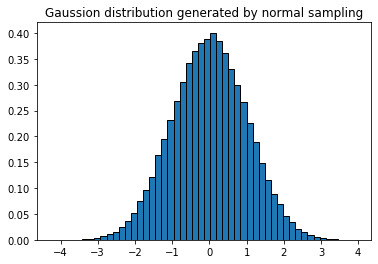

In [37]:
mean = 0
std_dev = 1
num_samples = 100000

start_time = time.time()
samples = [sample_gaussian_normal(mean, std_dev) for i in range(num_samples)]
print(time.time() - start_time, "seconds")
samples=np.array(samples)

plt.figure()
n, bins, patchs = plt.hist(samples,bins = 50, density = True, edgecolor = 'black')
plt.title("Gaussion distribution generated by normal sampling")

6.381359815597534 seconds


Text(0.5, 1.0, 'Gaussion distribution generated by rejection sampling')

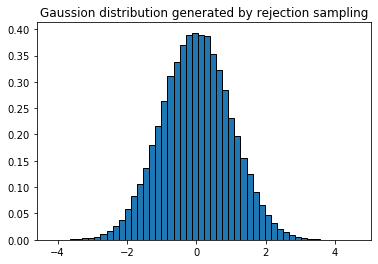

In [38]:
start_time = time.time()
samples = [sample_gaussian_rejection(mean, std_dev) for i in range(num_samples)]
print(time.time() - start_time, "seconds")
 
plt.figure()
n, bins, patchs = plt.hist(samples,bins = 50, density = True, edgecolor = 'black')
plt.title("Gaussion distribution generated by rejection sampling")

0.9535951614379883 seconds


Text(0.5, 1.0, 'Gaussion distribution generated by Box Muller transformation')

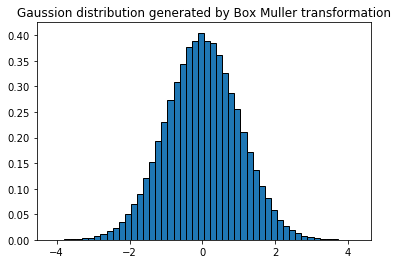

In [39]:
# Box-Mullerstart_time = time.time()
start_time = time.time()
samples = [sample_gaussian_muller(mean, std_dev) for i in range(num_samples)]
print(time.time() - start_time, "seconds")
 
plt.figure()
n, bins, patchs = plt.hist(samples,bins = 50, density = True, edgecolor = 'black')
plt.title("Gaussion distribution generated by Box Muller transformation")

Text(0.5, 1.0, 'Gaussion distribution')

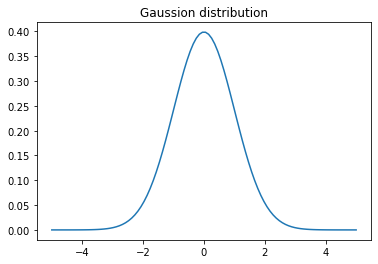

In [41]:
x = np.linspace(-5*std_dev,5*std_dev,100)
y = [gaussian(i, mean, std_dev) for i in x]

plt.figure()
plt.plot(x,y)
plt.title("Gaussion distribution")

### Exercise 2: Odometry-based Motion Model

In [50]:
def sample_odometry_motion(pose, u, alpha):
    x, y, theta = pose
    rot1, rot2, trans = u
    alpha1, alpha2, alpha3, alpha4 = alpha

    std_dev_rot1 = alpha1*abs(rot1)+alpha2*trans
    std_dev_rot2 = alpha1*abs(rot2)+alpha2*trans
    std_dev_trans = alpha3*trans + alpha4*abs(rot1) + alpha4*abs(rot2)

    rot1_sample = rot1 - sample_gaussian_muller(0, std_dev_rot1)
    rot2_sample = rot2 - sample_gaussian_muller(0, std_dev_rot2)
    trans_sample = trans - sample_gaussian_muller(0, std_dev_trans)

    x_sample = x + trans_sample*math.cos(theta+rot1_sample)
    y_sample = y + trans_sample*math.sin(theta+rot1_sample)
    theta_sample = theta + rot1_sample + rot2_sample
    
    return [x_sample,y_sample,theta_sample]
    

I will expect a normal distribution for every dimension

(4, 6)

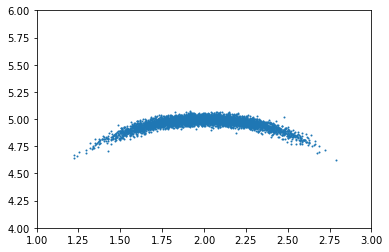

In [56]:
pose = [2.0, 4.0, 0]
u = [np.pi/2, 0, 1.0]
alpha = [0.1, 0.1, 0.01, 0.01] 

num_samples = 5000
samples = [sample_odometry_motion(pose,u,alpha) for i in range(num_samples)]
x_samples = np.array(samples)[:,0]
y_samples = np.array(samples)[:,1]

plt.figure()
plt.plot(x_samples,y_samples, 'o', markersize=1)
plt.xlim(1,3)
plt.ylim(4,6)